In [18]:
import sys
sys.path.append('C:/Users/hossein/Desktop/github/dorna_vision/')
from camera import Camera
from dorna_vision.board import Charuco
from dorna2 import Dorna, Kinematic
import cv2
import numpy as np
import time
%matplotlib widget
import matplotlib.pyplot as plt

In [14]:
# parameters
T_cam_2_j4 = np.matrix([[-9.99920230e-01, -3.42457264e-03,  1.22432824e-02,  7.68865611e+00],
                        [ 3.26439435e-03, -9.99907934e-01,  1.30910399e-02,  4.83039759e+01],
                        [ 1.22015316e-02, -1.31299625e-02,  9.99839350e-01,  3.74904752e+01],
                        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])
distance = 40
robot_ip = "192.168.254.54" 
model = "dorna_ta"
sqr_x=8
sqr_y=8
sqr_length=12
marker_length=8
dictionary="DICT_6X6_250"
refine="CORNER_REFINE_APRILTAG"
subpix=False

# camera
camera = Camera()
camera.connect()

# Robot
robot = Dorna()
robot.connect(robot_ip)

# kinematics
kinematic = Kinematic(model)    

In [33]:
# move the robot to the capturing position
robot.set_motor(1)
robot.jmove(rel=0, vel=50, accel=800, jerk=1000, j0=0, j1=60, j2=-120, j3=0,j4=-45, j5=0)
robot.sleep(1)

2.0

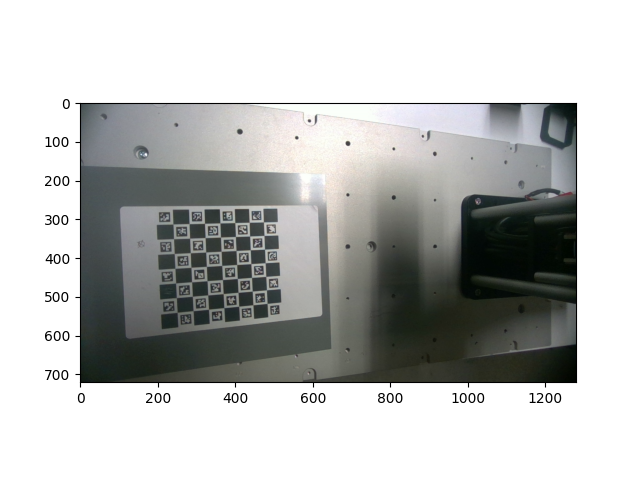

In [34]:
# camera data
depth_frame, _, _, _, _, color_img, depth_int, _, _= camera.get_all()

# Display the image
fig, ax = plt.subplots(frameon=False)
ax.imshow(cv2.cvtColor(color_img, cv2.COLOR_BGR2RGB))
plt.show()

In [37]:
# robot moves
# destination pixel
x = 156
y = 363
distance = 50
# T_target_2_cam
xyz_target_2_cam, _ = camera.xyz((x, y), depth_frame, depth_int)
T_target_2_cam = np.eye(4)
T_target_2_cam[:3, 3] = np.ravel(xyz_target_2_cam)

# current joint and pose
joint = robot.get_all_joint()
T_j4_2_base = kinematic.Ti_r_world(i=5, joint=joint[0:6])

# target_2_base
T_target_2_base = np.matmul(T_j4_2_base, np.matmul(T_cam_2_j4, T_target_2_cam) )
xyz_target_2_base =T_target_2_base[:3, 3].flatten().tolist()[0]            
print("xyz_target_2_base: ", xyz_target_2_base)

# robot
robot.set_motor(1)
robot.sleep(1)
robot.lmove(rel=0, vel=50, accel=800, jerk=1000, x=xyz_target_2_base[0], y=xyz_target_2_base[1], z=xyz_target_2_base[2] + distance, b=0)


xyz_target_2_base:  [398.51833463891836, -3.1481763742243416, 19.6925715734952]


-100.0

In [13]:
# terminate the session
camera.close()
robot.close()

True